In [7]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ablone = pd.read_csv('abalone.txt',sep='\t',header=None)

In [6]:
ablone.head()

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df = DataFrame(data=np.random.randint(0,100,size=(5,5)),index=list('ABCDE'),columns=list('甲乙丙丁戊'))
df

,甲,乙,丙,丁,戊
A,22,93,59,55,45
B,92,42,39,9,97
C,1,12,22,92,2
D,29,17,16,77,74
E,65,21,60,60,43


In [12]:
df[['甲','乙','丙']]

,甲,乙,丙
A,22,93,59
B,92,42,39
C,1,12,22
D,29,17,16
E,65,21,60


In [16]:
# 重要
df.loc['A':'B','甲':'丙']

,甲,乙,丙
A,22,93,59
B,92,42,39


In [18]:
df.iloc[:,0:3]

,甲,乙,丙
A,22,93,59
B,92,42,39
C,1,12,22
D,29,17,16
E,65,21,60


In [20]:
# 嗷嗷重要
df.values[:,0:3]

array([[22, 93, 59],
       [92, 42, 39],
       [ 1, 12, 22],
       [29, 17, 16],
       [65, 21, 60]])

In [21]:
# 重要
df['戊']

A    45
B    97
C     2
D    74
E    43
Name: 戊, dtype: int32

In [22]:
# 重要
df.values[:,-1]

array([45, 97,  2, 74, 43])

In [ ]:
dataframe 直接中括号访问
行索引  切片
列索引  索引

In [27]:
# 获取样本特征集和样本标签
# 标签：你研究谁，谁就是标签
# 特征：所有可能对样本标签产生影响的都可以作为特征存在
train = ablone.values[:,:-1]
target = ablone.values[:,-1]
display(train.shape,target.shape)

(4177, 8)

(4177,)

In [28]:
target

array([15.,  7.,  9., ...,  9., 10., 12.])

In [29]:
# 选择算法模型
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [30]:
# 拆分训练练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=1)

In [48]:
knn = KNeighborsRegressor(n_neighbors=19)
line = LinearRegression()
ridge = Ridge()
lasso = Lasso(alpha=0.001)

knn.fit(X_train,y_train)
line.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

y1_ = knn.predict(X_test)
y2_ = line.predict(X_test)
y3_ = ridge.predict(X_test)
y4_ = lasso.predict(X_test)

In [33]:
# 用于评估回归模型
from sklearn.metrics import r2_score

In [49]:
# 比较不同模型的大小即可
r2_score(y_test,y1_)

0.5190154675749529

In [38]:
r2_score(y_test,y2_)

0.49923172778748737

In [39]:
r2_score(y_test,y3_)

0.49471158849652064

In [45]:
r2_score(y_test,y4_)

0.49772661267890805

In [ ]:
# 选择KNN算法，因为KNN有更好的拟合优度，使用r2_score计算出来的

In [ ]:
需求：根据给定样本数据，构建一个机器学习模型，能够预测鲍鱼年龄
1. 请给出你的算法模型，并说明选择该算法模型的理由
2. 请绘制出鲍鱼年龄与任意一条特征的关系，绘制出关系曲线

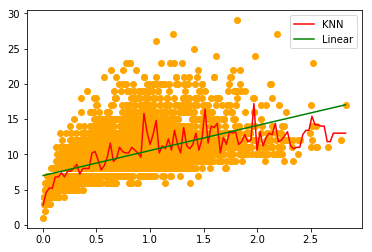

In [59]:
# 以标签为4的列为例，研究年龄与此特征的关系
train4 = ablone[4].values.reshape(-1,1)

knn1 = KNeighborsRegressor()
line1 = LinearRegression()

knn1.fit(train4,target)
line1.fit(train4,target)

plt.scatter(train4,target,color='orange')

X_test1 = np.linspace(train4.min(),train4.max(),100).reshape(-1,1)
y_1 = knn1.predict(X_test1)
y_2 = line1.predict(X_test1)

plt.plot(X_test1,y_1,label='KNN',color='red')
plt.plot(X_test1,y_2,label='Linear',color='green')
plt.legend()